In [2]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [7]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')
    df_train['class'].replace({1 : -1, 0 : 1}, inplace = True)

    normal = df_train.loc[df_train['class'] == 1]
    anomaly = df_train.loc[df_train['class'] == -1]
    
    limit = normal.shape[1]-1
    
    X_train = normal.iloc[:,0:limit]
    Y_train = normal.iloc[:,limit]
    
    return X_train, Y_train, df_train, normal, anomaly

X_train, Y_train, df_train, normal, anomaly = load_train_dataset()

In [10]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')
    df_test['class'].replace({1 : -1, 0 : 1}, inplace = True)

    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [25]:
Y_test

0       -1
1       -1
2        1
3       -1
4       -1
        ..
22305    1
22306    1
22307   -1
22308    1
22309   -1
Name: class, Length: 22310, dtype: int64

In [18]:
oneclass_classifier = OneClassSVM(gamma=0.05,nu=0.5).fit(X_train)

In [19]:
predictions = oneclass_classifier.predict(X_test)

In [17]:
oneclass_classifier.score_samples(X_train)

array([21026.83304946, 19668.36860481, 21082.87315446, ...,
       21277.68155929, 20323.73908462, 15780.92740605])

In [29]:
predictions

array([-1, -1,  1, ...,  1, -1, -1], dtype=int64)

In [30]:
ans = pd.DataFrame(predictions)

In [36]:
ans[0].unique()

array([-1,  1], dtype=int64)

In [37]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=14)
    plt.text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=14)
    plt.text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=14)
    plt.text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=14)

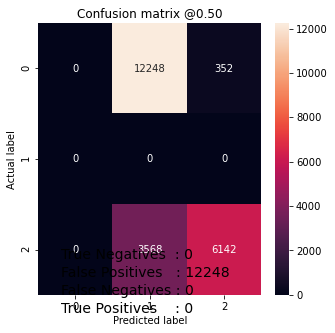

In [38]:
plot_cm(Y_test, predictions)

In [22]:
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

          -1       0.77      0.97      0.86     12600
           1       0.95      0.63      0.76      9710

    accuracy                           0.82     22310
   macro avg       0.86      0.80      0.81     22310
weighted avg       0.85      0.82      0.82     22310



c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


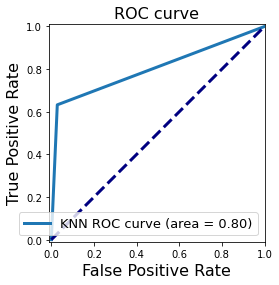

In [24]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [ ]:
param_grid = {'gamma' : [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75],
              'nu' : list(range(1,100,2))}

optimal_params = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    cv=5,
    scoring ='accuracy',
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)